#PhlyGreen Tutorial 

Import packages

In [1]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt

Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [4]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
battery = pg.Systems.Battery.Battery(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

Create instance of Aircraft object.

In [6]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, battery,climateimpact)

Create the connections with its subsystems.

In [7]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
battery.aircraft = myaircraft

In [8]:
AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 11, 'e_osw': 0.8}},
                    'Take Off Cl': 1.9,
                     'Landing Cl': 1.9,
                     'Minimum Cl': 0.20,
                     'Cd0': 0.017}
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.aerodynamics.SetInput()

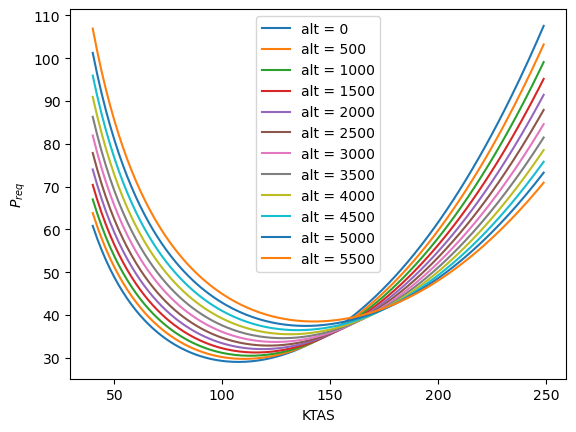

In [9]:
for h in np.arange(0,6000,500):
    plt.plot(np.arange(40,250,1),[myaircraft.performance.PoWTO(2100,0.9,0,1,altitude=h,DISA=0,speed=i,speedtype='KTAS') for i in range(40,250,1)],label='alt = '+str(h))
plt.xlabel('KTAS')
plt.ylabel('$P_{req}$')
plt.legend()

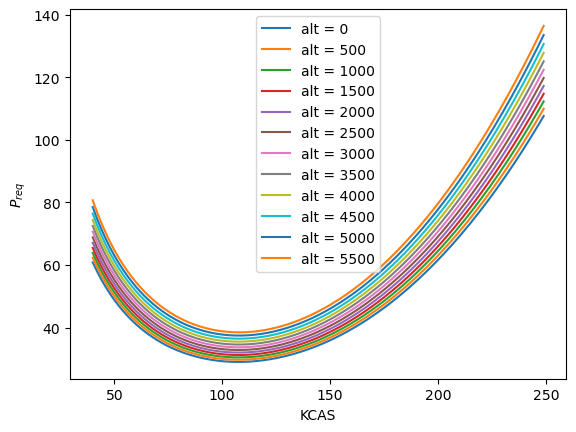

In [10]:
for h in np.arange(0,6000,500):
    plt.plot(np.arange(40,250,1),[myaircraft.performance.PoWTO(2100,0.9,0,1,altitude=h,DISA=0,speed=i,speedtype='KCAS') for i in range(40,250,1)],label='alt = '+str(h))
plt.xlabel('KCAS')
plt.ylabel('$P_{req}$')
plt.legend()


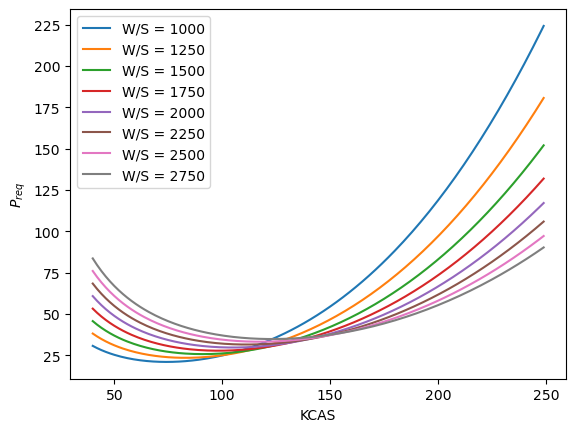

In [11]:
for wos in np.arange(1000,3000,250):
    plt.plot(np.arange(40,250,1),[myaircraft.performance.PoWTO(wos,0.9,0,1,altitude=1000,DISA=0,speed=i,speedtype='KCAS') for i in range(40,250,1)],label='W/S = '+str(wos))

plt.xlabel('KCAS')
plt.ylabel('$P_{req}$')
plt.legend()